# Sample Stacked Barplots 

In [1]:
import os.path
import pandas as pd
import numpy as np
#from datetime import datetime, date, timedelta
#from dateutil import relativedelta
#import time

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html, display, HTML

%matplotlib inline

## Simple Example From: 
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

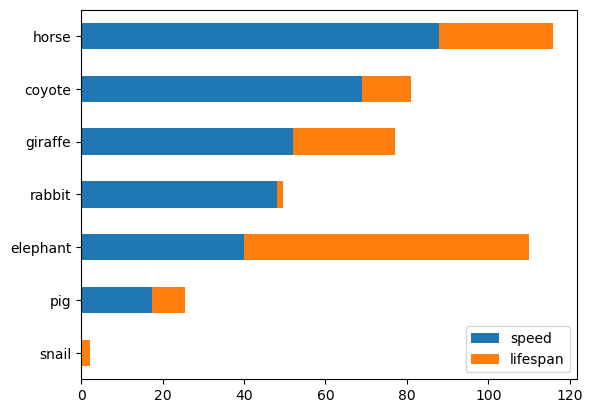

In [2]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
#ax = df.plot.bar(rot=0)
ax = df.plot.barh(stacked=True)

In [3]:
df

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


# Additional Examples using multi index

## Create a multi-index dataframe

In [4]:
idx = pd.MultiIndex.from_product([['Tutor 5', 'Tutor 6', 'Tutor 7'],
                                  ['Math', 'English', 'Science']],
                                 names=['Attendance', 'Course'])
col = ['Week1', 'Week2', 'Week3', 'Week4']

df = pd.DataFrame(np.random.randint(0,25,size=(9, 4)), idx, col)
df

Week1  Week2  Week3  Week4
Attendance Course                             
Tutor 5    Math        22      5     11      0
           English     12     11     16      7
           Science     12      5      0     18
Tutor 6    Math        10      1     13      6
           English     14     15     21     15
           Science      2     21      8     13
Tutor 7    Math        24     23     20      3
           English      0      9     17      5
           Science     21     14      0      0

## Order by Tuple and Average

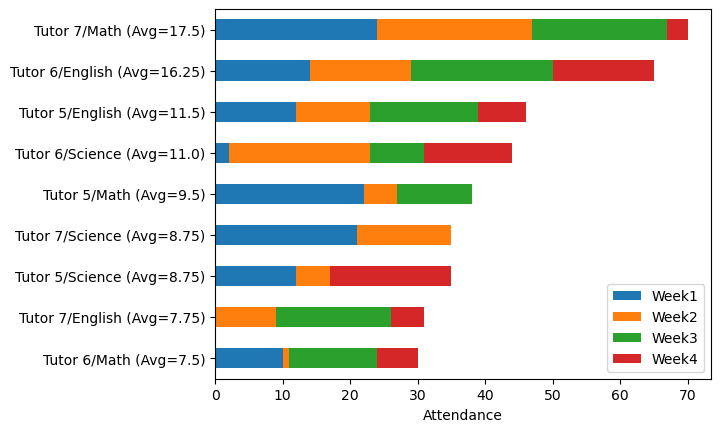

In [5]:
df['avg'] = df.mean(axis=1)
df.index = df.index.to_series().apply(lambda x: '{0}/{1}'.format(*x)) + ' (Avg=' + df['avg'].astype(str) +')'
df = df.sort_values(by=['avg'])
del df['avg']
ax = df.plot(kind='barh', stacked=True)
ax.set_xlabel('Attendance')
plt.show()

## Order by Tutor

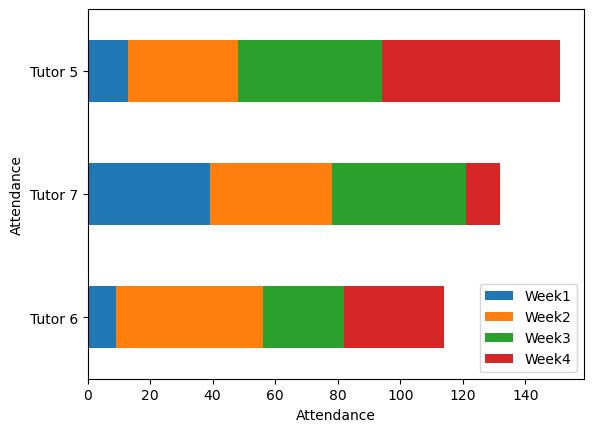

In [6]:
idx = pd.MultiIndex.from_product([['Tutor 5', 'Tutor 6', 'Tutor 7'],
                                  ['Math', 'English', 'Science']],
                                 names=['Attendance', 'Course'])
col = ['Week1', 'Week2', 'Week3', 'Week4']

df = pd.DataFrame(np.random.randint(0,25,size=(9, 4)), idx, col)
plot_df = df.groupby(level=[0]).sum()

plot_df['total'] = plot_df.sum(axis=1)
plot_df = plot_df.sort_values(by=['total'])
del plot_df['total']
ax = plot_df.plot(kind='barh', stacked=True)
ax.legend(loc='lower right')
ax.set_xlabel('Attendance')
plt.show()

## Order by Course

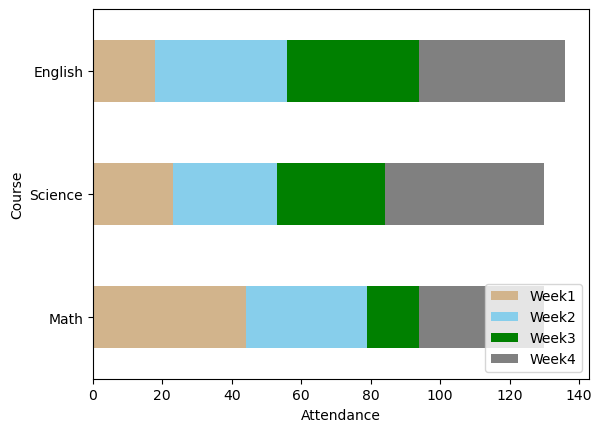

In [7]:
idx = pd.MultiIndex.from_product([['Tutor 5', 'Tutor 6', 'Tutor 7'],
                                  ['Math', 'English', 'Science']],
                                 names=['Attendance', 'Course'])
col = ['Week1', 'Week2', 'Week3', 'Week4']

df = pd.DataFrame(np.random.randint(0,25,size=(9, 4)), idx, col)
plot_df = df.groupby(level=[1]).sum()

plot_df['total'] = plot_df.sum(axis=1)
plot_df = plot_df.sort_values(by=['total'])
del plot_df['total']
ax = plot_df.plot(kind='barh', stacked=True, color=['tan', 'skyblue', 'green', 'grey'])
ax.legend(loc='lower right')
ax.set_xlabel('Attendance')
plt.show()

## Manipulate the legend, index and show percentage

In [8]:
plot_df = df.groupby('Course').sum().reset_index()
result_df = pd.melt(plot_df, id_vars=['Course'], var_name='Week', value_name='Attendance')
result_df = result_df.set_index(['Course', 'Week']).stack().unstack([1,2])
result_df['sum'] = result_df.sum(axis=1)
result_df = result_df.sort_values(by=['sum'])
sessionCount = result_df['sum'].sum()
result_df.index = result_df.index + ' (n=' + result_df['sum'].astype(str) + ')'
result_df

Week,Week1,Week2,Week3,Week4,sum
,Attendance,Attendance,Attendance,Attendance,
Math (n=130),44,35,15,36,130
Science (n=130),23,30,31,46,130
English (n=136),18,38,38,42,136


In [9]:
del result_df['sum']
result_df = result_df.div(result_df.sum(axis=1), axis=0)*100
result_df

Week,Week1,Week2,Week3,Week4
,Attendance,Attendance,Attendance,Attendance
Math (n=130),33.846154,26.923077,11.538462,27.692308
Science (n=130),17.692308,23.076923,23.846154,35.384615
English (n=136),13.235294,27.941176,27.941176,30.882353


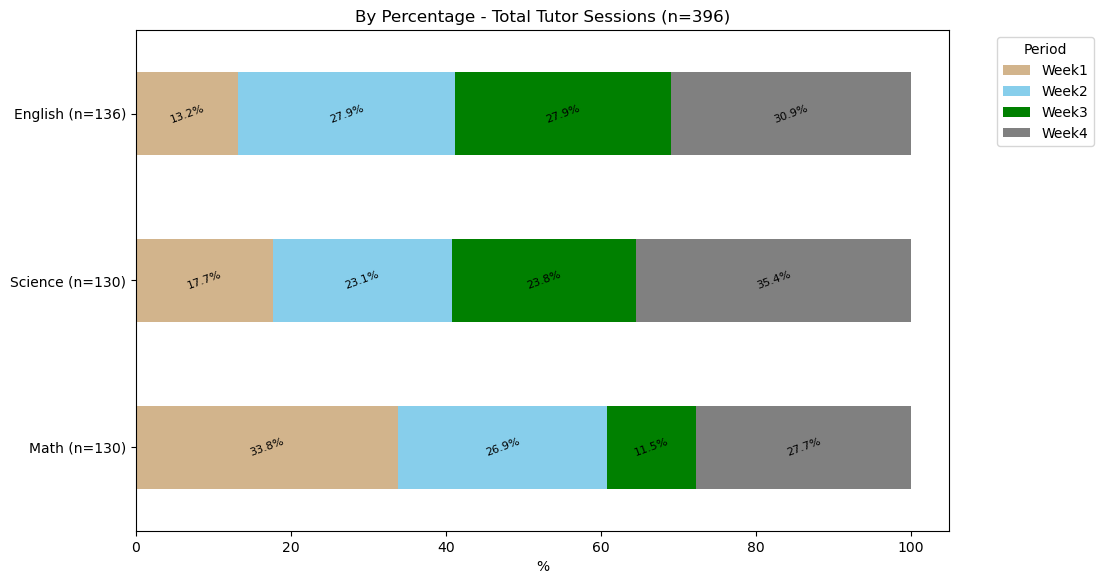

In [10]:
ax = result_df.plot(kind='barh', stacked=True, color=['tan', 'skyblue', 'green', 'grey'])
legend = plt.legend( title="Weeks",
                    loc=4, fontsize='small', fancybox=True)
handles, labels = ax.get_legend_handles_labels()
#labels = [str(x+1) for x in range (len(labels))]
labels = [x[x.find("(")+1:x.find(")")].split(',')[0] for x in labels]
ax.legend(handles, labels, title='Period', bbox_to_anchor=(1.05, 1.00))
ax.set_xlabel('%')
ax.set_title('By Percentage - Total Tutor Sessions (n=' + str(sessionCount) + ')')
for n in result_df:
    for i, (cs, ab, pc) in enumerate(zip(result_df.cumsum(1)[n], 
                                         result_df[n], result_df[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center', rotation = 20, fontsize = 8)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
fig.savefig('fancy_barplot.png', bbox_inches='tight', dpi=300)
plt.show()

# Done - ZZZZZ